In [99]:
# General Libraries
import pandas as pd  # for handling dataframes
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting graphs
import numpy as np  # for numerical computing

In [100]:
# Scikit-Learn Libraries
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.metrics import mean_squared_error, confusion_matrix, recall_score, precision_score

In [101]:
# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model  # tensorflow keras API
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation  # tensorflow keras layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint  # callbacks for training
from tensorflow.keras.optimizers import Adam  # optimizer
from tensorflow.keras.utils import pad_sequences  # utility function for sequence padding
from tensorflow.keras import layers # import layers explicitly

**Feature set description**

|**Feature**         |**Description**|
|----------------|:----------------|
|Date Time       | year-month-day hour:minute:second   |
|Appliances      | energy use in Wh|
|lights          | energy use of light fixtures in the house in Wh|
|T1              | Temperature in kitchen area, in Celsius|
|RH_1            | Temperature in kitchen area, in Celsius|
|T2              | Temperature in living room area, in Celsius
|RH_2            | Humidity in living room area, in %
|T3              | Temperature in laundry room area
|RH_3            | Humidity in laundry room area, in %
|T4              | Temperature in office room, in Celsius
|RH_4            | Humidity in office room, in %
|T5              | Temperature in bathroom, in Celsius
|RH_5            | Humidity in bathroom, in %
|T6              | Temperature outside the building (north side), in Celsius
|RH_6            | Humidity outside the building (north side), in %
|T7              | Temperature in ironing room , in Celsius
|RH_7            | Humidity in ironing room, in %
|T8              | Temperature in teenager room 2, in Celsius
|RH_8            | Humidity in teenager room 2, in %
|T9              | Temperature in parents room, in Celsius
|RH_9            | Humidity in parents room, in %
|To              | Temperature outside (from Chievres weather station), in Celsius
|Pressure (from Chievres weather station) | in mm Hg
|RH_out Humidity outside (from Chievres weather station) | in %
|Wind speed (from Chievres weather station) | in m/s
|Visibility (from Chievres weather station) | in km
|Tdewpoint (from Chievres weather station) | Â°C
|rv1 | Random variable 1 nondimensional
|rv2 | Random variable 2 nondimensional


In [102]:
file_path = 'energydata_complete.csv'

# Read our dataset into our dataframe
df = pd.read_csv(file_path)
df_raw = df.copy()

# Print the head of the dataframe
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [103]:
# Check for missing values in the features
df.isna().sum()


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Per our output, we see not missing values in the dataset.

In [104]:
# Conver date to Datetime format
df['Datetime'] = pd.to_datetime(df['date'])

In [105]:
# Verify our dataframe types
df.dtypes

date                   object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
Datetime       datetime64[ns]
dtype: object

In [106]:
# Round all values to 2 decimal places for easier processing and formatting
df = df.round(2)

In [107]:
# Validate our rounding
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Datetime
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,2016-01-11 17:40:00


In [108]:
# Drop the 'Date' column
df = df.drop(columns=['date'])

# Move the 'Datetime' column to the first position
df = df[['Datetime'] + [col for col in df.columns if col != 'Datetime']]

In [109]:
df.head()

,Datetime,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,...,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,...,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,...,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,...,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,...,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08


In [110]:
correlation_matrix = df.corr()

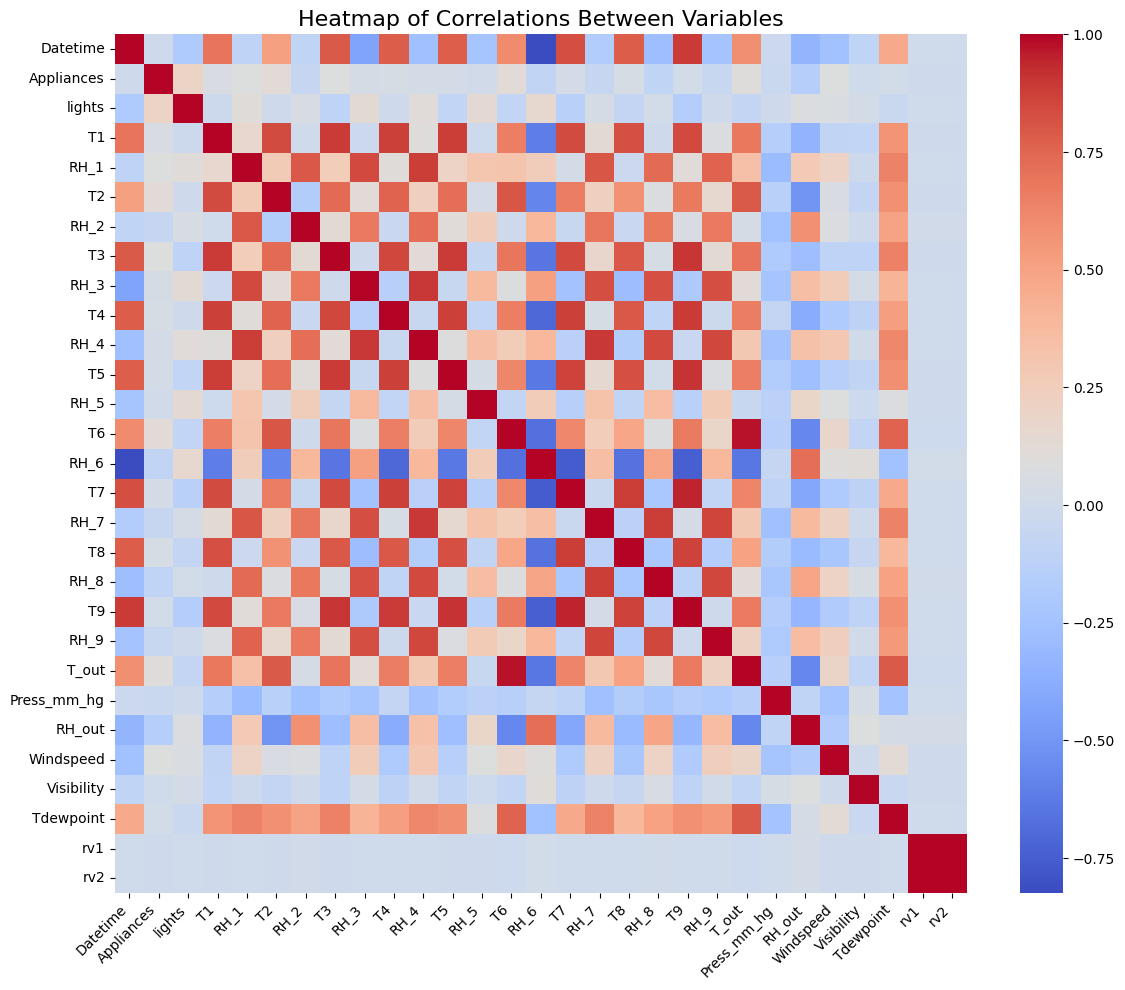

In [111]:
# Set up the figure size
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", cbar=True)

# Add titles and labels
plt.title('Heatmap of Correlations Between Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()

The below features were chosen based on their strong correlation with Appliances (energy consumption) while avoiding redundant or weak predictors. <br>
lights was included because lighting directly contributes to household energy use. Indoor temperature features (T1, T2) were selected as they <br>
impact HVAC operations, which are a major factor in energy consumption. T_out (outdoor temperature) and Tdewpoint were chosen because external <br>
weather conditions influence heating and cooling requirements inside the home. RH_out (outdoor humidity) and Windspeed were kept as they can affect <br>
temperature regulation and ventilation needs. Finally, hour was included to capture daily energy usage patterns, as appliance consumption tends to <br>
vary throughout the day. These features provide a balanced mix of internal conditions, external environmental influences, and time-based patterns, <br>
ensuring the model captures key factors affecting energy consumption.

|**Feature**         |**Description**|
|----------------|:----------------|
|lights                    | Directly affects energyh consumption  |
|T1 (Kitchen Temp)         | Strong correlation with Appliances    |
|T2 (Living Room Temp)     | Represents HVAC energy use            |
|T_out (Outside Temp)      | External factor on energy consumption |
|RH_out (Outdoor Humidity) | Impcasts cooling and heating          |
|Windspeed                 | Influences temp reulation             |
|Tdewpoint                 | Outdoor conditions                    |
|hour                      | Captures time-based energy patterns   |

# Energy Consumption Distribution

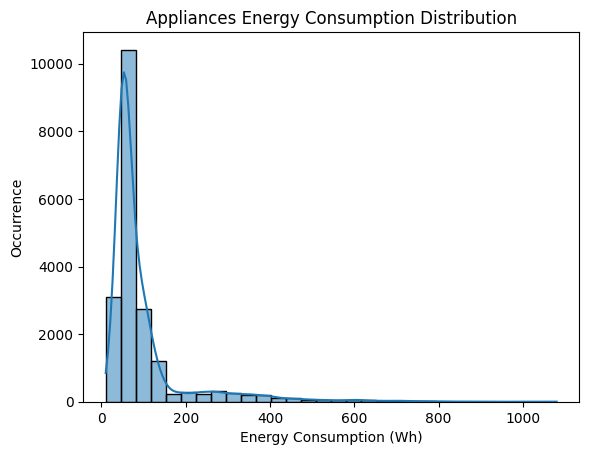

In [112]:
# Plot a distribution of the energy consumption
sns.histplot(df['Appliances'], bins=30, kde=True)
plt.title("Appliances Energy Consumption Distribution")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Occurrence")
plt.show()


1. We can see from our distribution plot for energy consumption that most of the consumption is < 200 Wh
2. A sharp peak > 50 Wh < 100 Wh suggests many appliances consume low energy.
3. We have a right skewed plot, dmeonstrating that anything > 400 Wh is rare.

# Average Hourly Energy Consumption

In [113]:
# Extract time-based features
df['hour'] = df['Datetime'].dt.hour  # Extract hour of the day (0-23)


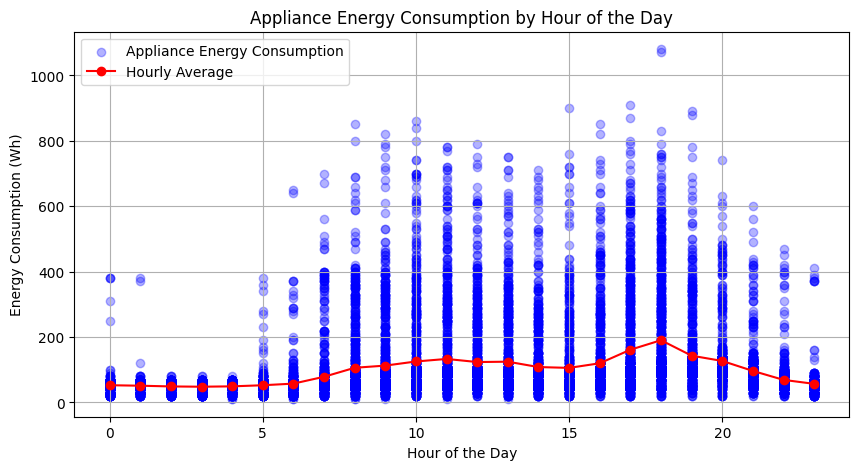

In [114]:
# Plot raw data (individual appliance consumption points)
plt.figure(figsize=(10, 5))
plt.scatter(df['hour'], df['Appliances'], alpha=0.3, color='blue', label="Appliance Energy Consumption")

# Overlay the 24-hour average trend
hourly_avg = df.groupby('hour')['Appliances'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='red', label="Hourly Average")

# Plot our hourly average across the dataset
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (Wh)")
plt.title("Appliance Energy Consumption by Hour of the Day")
plt.legend()
plt.grid()
plt.show()

The plot illustrates appliance energy consumption throughout the day, with individual data points representing energy usage <br>
at specific times and the red line indicating the hourly average. Energy consumption is relatively low during nighttime hours <br>
but begins to rise in the morning as household activity increases. The peak energy usage occurs during midday and early evening, <br>
which aligns with typical daily routines such as cooking, heating, or cooling adjustments. The observed fluctuations highlight <br>
key periods of high energy demand, which could be useful for optimizing energy consumption and implementing cost-saving strategies.

In [115]:
#sns.pairplot(df[['Appliances', 'lights', 'T1', 'T2', 'T_out', 'RH_out', 'Windspeed', 'Tdewpoint', 'hour']])
#plt.show()


# Feedfoward Neural Network (FNN)

In [116]:
# set our features and target
features = ['lights', 'T1', 'T2', 'T_out', 'RH_out', 'Windspeed', 'Tdewpoint', 'hour']
target = 'Appliances'

In [117]:
# Prepare our data for training
X = df[features]  # independent variables
y = df[target]  # target variable

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [118]:
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (15788, 8), Testing Set: (3947, 8)


In [119]:
# build of FNN
model = Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # input
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer for energy consumption prediction
])

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# model evaluation
loss, mae = model.evaluate(X_test, y_test)
print(f"Neural Network MAE: {mae:.2f} Wh")


Epoch 1/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14901.8926 - mae: 71.4165 - val_loss: 9216.8320 - val_mae: 55.3290
Epoch 2/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9888.3633 - mae: 55.1629 - val_loss: 9068.7217 - val_mae: 52.3179
Epoch 3/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10086.6562 - mae: 55.2268 - val_loss: 9016.4414 - val_mae: 55.1692
Epoch 4/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10230.3340 - mae: 56.8016 - val_loss: 8976.5332 - val_mae: 53.5403
Epoch 5/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9582.4570 - mae: 54.6447 - val_loss: 8966.6973 - val_mae: 53.4658
Epoch 6/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9832.9678 - mae: 55.3514 - val_loss: 8959.0537 - val_mae: 52.8149
Epoch 7/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9269.9248 - mae: 53.9472 - val_loss: 8938.1953 - val_mae: 53.7755
Epoch 8/50
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9703.7754 - mae: 55.1933 - val_loss: 8924.3721 - val_ma

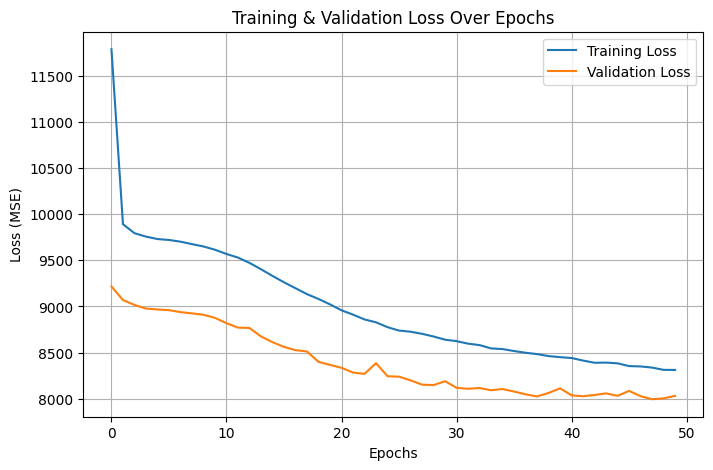

In [120]:
# Extract loss and validation loss from the training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

The training and validation loss curves for the first FNN model show a gradual decrease over the 50 epochs, indicating <br>
that the model is learning patterns from the data. Initially, both training and validation loss start high, but as training <br>
progresses, the loss values steadily decline, demonstrating improved predictive capability. However, the noticeable gap <br>
between training and validation loss suggests potential overfitting, where the model performs well on the training data <br>
but struggles to generalize to unseen data.

# FNN Optimized

In [121]:
# callbacks to prevent overfitting and optimize learning
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-5)

# updated our FNN model
model = Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # input Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # output layer for regression
])

# compile the model with a lower learning rate for stable training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# train the model with early stopping to prevent overfitting
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Optimized Neural Network MAE: {mae:.2f} Wh")


Epoch 1/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 13275.8936 - mae: 67.1752 - val_loss: 9165.6328 - val_mae: 56.7524 - learning_rate: 0.0010
Epoch 2/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9992.1748 - mae: 56.4569 - val_loss: 8897.5645 - val_mae: 51.8463 - learning_rate: 0.0010
Epoch 3/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9714.5703 - mae: 54.7939 - val_loss: 8772.7012 - val_mae: 51.1550 - learning_rate: 0.0010
Epoch 4/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9556.4004 - mae: 55.4330 - val_loss: 8690.9199 - val_mae: 50.5897 - learning_rate: 0.0010
Epoch 5/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9889.2070 - mae: 55.5660 - val_loss: 8572.2871 - val_mae: 50.5544 - learning_rate: 0.0010
Epoch 6/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9229.7637 - mae: 54.0326 - val_loss: 8489.1670 - val_mae: 50.3709 - learning_rate: 0.0010
Epoch 7/100
987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9438.7930 - mae: 55.1512 - val_l

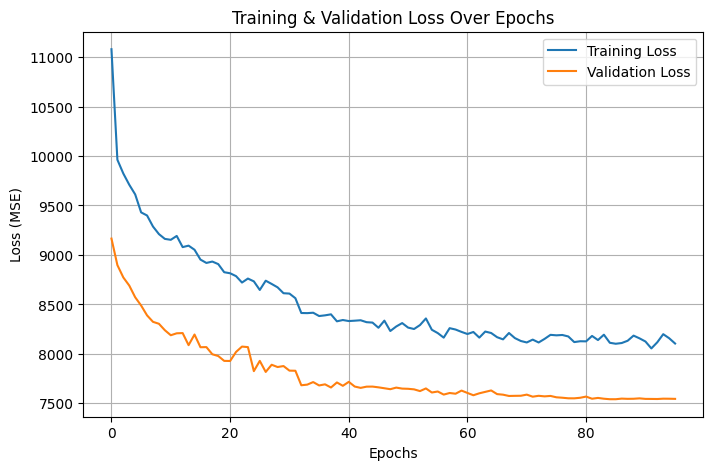

In [122]:

# Extract loss and validation loss from the training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


The optimized FNN model exhibits a smoother loss curve, demonstrating more stable learning throughout the training process. <br>
By incorporating dropout layers and adjusting the learning rate, the model effectively reduced overfitting and improved <br>
generalization. The validation loss is lower and more stable compared to the initial FNN, indicating improved predictive <br>
performance. Despite these enhancements, there is still a gap between training and validation loss, suggesting that further <br>
tuning could enhance performance even more.

# LSTM

In [123]:
# Normalize the data
scaler = StandardScaler()
feat_cols = ['Appliances']  # Define the features
df[feat_cols] = scaler.fit_transform(df[feat_cols])

# Define target variable
target_col = 'Appliances'

In [124]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].reset_index(drop=True)
val_df = df.iloc[train_size:].reset_index(drop=True)

# Define X_train (features for LSTM)
X_train = train_df[feat_cols].values

# Define model parameters
nb_features = X_train.shape[1]
nb_out = 1

In [125]:
# Sequence parameters
seq_length = 60
ph = 5

# Prepare training sequences
seq_arrays = []
seq_labs = []

# Generate training sequences by extracting past `seq_length` time steps as input
# and predicting the target value `ph` time steps ahead
for i in range(len(train_df) - seq_length - ph):
    seq = train_df[feat_cols].iloc[i:i + seq_length].values
    label = train_df[target_col].iloc[i + seq_length + ph - 1]
    seq_arrays.append(seq)
    seq_labs.append(label)

# Convert sequences to NumPy arrays
seq_arrays = np.array(seq_arrays, dtype=np.float32)
seq_labs = np.array(seq_labs, dtype=np.float32).reshape(-1)

In [126]:
# Define model path
model_path = 'LSTM_base_model.keras'

# Initialize a sequential LSTM model for time series prediction
model = Sequential()
model.add(LSTM(units=50, input_shape=(seq_length, nb_features), return_sequences=True))  # First LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=25, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(units=nb_out))  # Output layer for prediction
model.add(Activation('linear'))  # Linear activation for continuous output

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

# Print model summary
print(model.summary())

# Train the model without callbacks
history = model.fit(
    seq_arrays, seq_labs,
    epochs=100,
    batch_size=500,
    validation_split=0.1,
    verbose=2
)

c:\Users\jam\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
29/29 - 10s - 334ms/step - loss: 0.8953 - mse: 0.8953 - val_loss: 0.6733 - val_mse: 0.6733
Epoch 2/100
29/29 - 6s - 200ms/step - loss: 0.8640 - mse: 0.8640 - val_loss: 0.6632 - val_mse: 0.6632
Epoch 3/100
29/29 - 6s - 192ms/step - loss: 0.8633 - mse: 0.8633 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 4/100
29/29 - 6s - 194ms/step - loss: 0.8602 - mse: 0.8602 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 5/100
29/29 - 6s - 199ms/step - loss: 0.8491 - mse: 0.8491 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 6/100
29/29 - 6s - 197ms/step - loss: 0.8493 - mse: 0.8493 - val_loss: 0.6352 - val_mse: 0.6352
Epoch 7/100
29/29 - 6s - 194ms/step - loss: 0.8452 - mse: 0.8452 - val_loss: 0.6355 - val_mse: 0.6355
Epoch 8/100
29/29 - 6s - 194ms/step - loss: 0.8373 - mse: 0.8373 - val_loss: 0.6329 - val_mse: 0.6329
Epoch 9/100
29/29 - 6s - 198ms/step - loss: 0.8293 - mse: 0.8293 - val_loss: 0.6574 - val_mse: 0.6574
Epoch 10/100
29/29 - 6s - 199ms/step - loss: 0.8385 - mse: 0.8385 - val_loss

The model consists of two LSTM layers (50 and 25 units) with Dropout (20%) to prevent overfitting, followed by a Dense layer with a linear activation for regression. It is compiled using the Adam optimizer (learning rate = 0.005) and Mean Squared Error (MSE) loss. The model trains for 100 epochs with a batch size of 500, using 90% of data for training and 10% for validation.

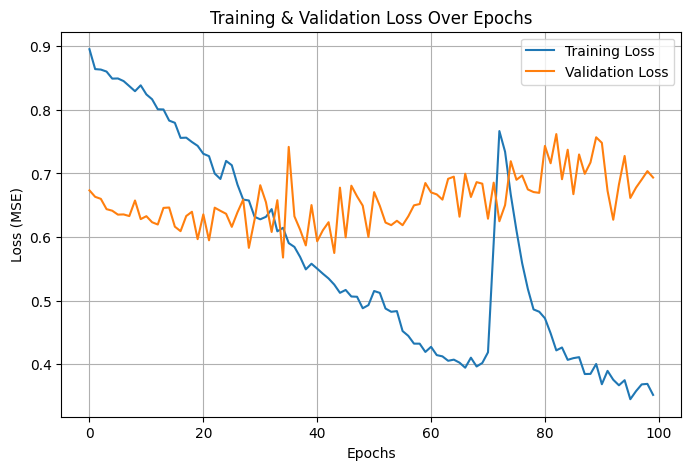

In [127]:
# Extract loss and validation loss from the training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

The training loss (blue) steadily decreases, indicating that the model is learning patterns from the data. However, the validation loss (orange) fluctuates significantly after the initial epochs, suggesting potential overfitting, where the model fails to generalize well to unseen data.

122/122 - 1s - 12ms/step - loss: 0.6112 - mse: 0.6112

MSE: 0.611221194267273
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


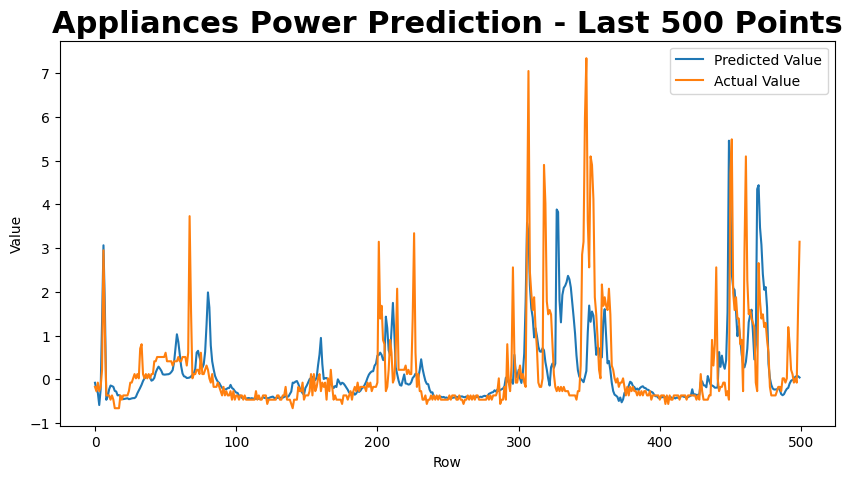

In [128]:
# Prepare validation sequences
val_arrays = []
val_labs = []

# Prepare validation sequences by extracting past `seq_length` time steps as input
# and predicting the feature values `ph` time steps ahead
for i in range(seq_length, len(val_df) - ph):
    seq = val_df[feat_cols].iloc[i - seq_length:i].values
    label = val_df[feat_cols].iloc[i + ph - 1].values
    val_arrays.append(seq)
    val_labs.append(label)

# Convert lists into NumPy arrays for efficient computation and compatibility
val_arrays = np.array(val_arrays, dtype=np.float32)
val_labs = np.array(val_labs, dtype=np.float32).reshape(-1)

# Evaluate the model
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))

# Predictions
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs

# Plot the results
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-500:], label='Predicted Value')
plt.plot(y_true_test[-500:], label='Actual Value')
plt.title('Appliances Power Prediction - Last 500 Points', fontsize=22, fontweight='bold')
plt.ylabel('Value')
plt.xlabel('Row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")

The blue line represents the predicted values, while the orange line represents the actual recorded appliance power usage. The model effectively captures general consumption trends, particularly during stable periods. However, prediction errors become evident around sharp peaks, indicating difficulties in capturing sudden changes in appliance energy demand. The model also exhibits lag in its predictions, where it struggles to adjust rapidly to sudden fluctuations in energy usage.


# LSTM Optimized

In [129]:
# Normalize the data
scaler = StandardScaler()
feat_cols = ['Appliances']
df[feat_cols] = scaler.fit_transform(df[feat_cols])

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].reset_index(drop=True)  # First 80% for training
val_df = df.iloc[train_size:].reset_index(drop=True)    # Last 20% for validation

In [130]:
# Sequence parameters
seq_length = 60  # Increased sequence length
ph = 5

# Prepare training sequences
seq_arrays = []
seq_labs = []

# Generate training sequences by extracting past `seq_length` time steps as input
# and predicting the target value `ph` time steps ahead
for i in range(len(train_df) - seq_length - ph):
    seq = train_df[feat_cols].iloc[i:i + seq_length].values
    label = train_df[feat_cols].iloc[i + seq_length + ph - 1].values
    seq_arrays.append(seq)
    seq_labs.append(label)

seq_arrays = np.array(seq_arrays, dtype=np.float32)
seq_labs = np.array(seq_labs, dtype=np.float32).reshape(-1)

assert seq_arrays.shape == (len(train_df) - seq_length - ph, seq_length, len(feat_cols))
assert seq_labs.shape == (len(train_df) - seq_length - ph,)

In [131]:
# Build the LSTM model
model_path = 'LSTM_model1.keras'
nb_features = len(feat_cols)
nb_out = 1

model = Sequential()
model.add(LSTM(units=50, input_shape=(seq_length, nb_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out))
model.add(Activation('linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)  # Adjusted learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

print(model.summary())

# Callbacks

# Learning rate scheduler: Reduces learning rate by a factor of 0.5 if validation loss does not improve for 5 epochs
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Early stopping: Stops training if validation loss does not improve for 10 consecutive epochs, preventing overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Model checkpoint: Saves the model with the best validation loss during training to avoid saving suboptimal weights
model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=1)


# Train the model
history = model.fit(
    seq_arrays, seq_labs,
    epochs=100,
    batch_size=500,
    validation_split=0.1,
    verbose=2,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)


c:\Users\jam\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100

Epoch 1: val_loss improved from inf to 0.66259, saving model to LSTM_model1.keras
29/29 - 8s - 285ms/step - loss: 0.9133 - mse: 0.9133 - val_loss: 0.6626 - val_mse: 0.6626 - learning_rate: 0.0050
Epoch 2/100

Epoch 2: val_loss improved from 0.66259 to 0.66070, saving model to LSTM_model1.keras
29/29 - 5s - 158ms/step - loss: 0.8686 - mse: 0.8686 - val_loss: 0.6607 - val_mse: 0.6607 - learning_rate: 0.0050
Epoch 3/100

Epoch 3: val_loss did not improve from 0.66070
29/29 - 4s - 154ms/step - loss: 0.8633 - mse: 0.8633 - val_loss: 0.6658 - val_mse: 0.6658 - learning_rate: 0.0050
Epoch 4/100

Epoch 4: val_loss improved from 0.66070 to 0.66060, saving model to LSTM_model1.keras
29/29 - 4s - 152ms/step - loss: 0.8619 - mse: 0.8619 - val_loss: 0.6606 - val_mse: 0.6606 - learning_rate: 0.0050
Epoch 5/100

Epoch 5: val_loss improved from 0.66060 to 0.64874, saving model to LSTM_model1.keras
29/29 - 4s - 151ms/step - loss: 0.8543 - mse: 0.8543 - val_loss: 0.6487 - val_mse: 0.64

The model consists of two LSTM layers with Dropout regularization to prevent overfitting, followed by a dense output layer with a linear activation function for regression. The model is compiled using the Adam optimizer with a learning rate of 0.005 and is trained to minimize mean squared error (MSE).

To optimize training, callbacks are implemented, including ReduceLROnPlateau to dynamically adjust the learning rate, EarlyStopping to halt training if validation loss does not improve for 10 epochs, and ModelCheckpoint to save the best-performing model. The model is trained for 100 epochs with a batch size of 500, using 10% of the data for validation.

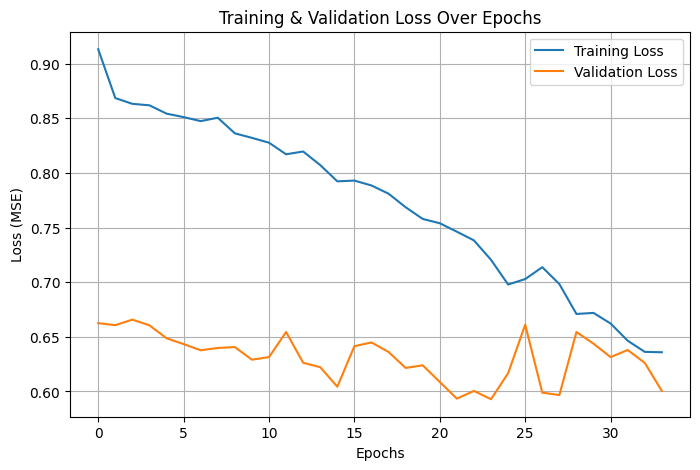

In [132]:
# Extract loss and validation loss from the training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

The training loss shows a steady decline, indicating that the model is learning effectively. The validation loss also decreases initially but stabilizes after a certain point, suggesting that the model is generalizing well to unseen data. The absence of major fluctuations in validation loss indicates that overfitting is minimized, likely due to the implementation of learning rate scheduling, early stopping, and dropout regularization.

122/122 - 1s - 10ms/step - loss: 0.5542 - mse: 0.5542

MSE: 0.5542453527450562
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


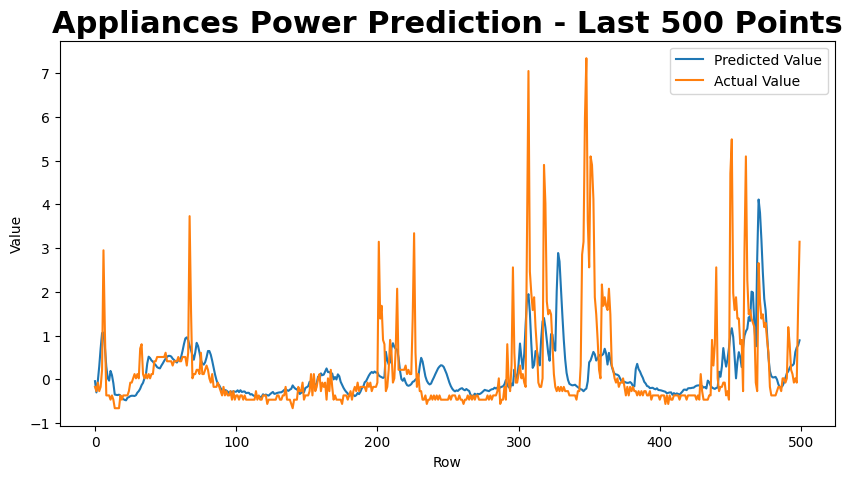

In [133]:
# Prepare validation sequences
val_arrays = []
val_labs = []

for i in range(seq_length, len(val_df) - ph):
    seq = val_df[feat_cols].iloc[i - seq_length:i].values
    label = val_df[feat_cols].iloc[i + ph - 1].values
    val_arrays.append(seq)
    val_labs.append(label)

val_arrays = np.array(val_arrays, dtype=np.float32)
val_labs = np.array(val_labs, dtype=np.float32).reshape(-1)

# Evaluate the model
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))

# Predictions
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs

# Plot the results
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test[-500:], label='Predicted Value')
plt.plot(y_true_test[-500:], label='Actual Value')
plt.title('Appliances Power Prediction - Last 500 Points', fontsize=22, fontweight='bold')
plt.ylabel('Value')
plt.xlabel('Row')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")

The plot illustrates the actual and predicted appliance power consumption for the last 500 data points. The predicted values (blue line) closely follow the actual values (orange line), capturing the general trends and variations in power usage. However, some peaks and fluctuations show slight deviations, indicating areas where the model's predictions could be improved. Overall, the model demonstrates a reasonable ability to track appliance energy consumption patterns.